<a href="https://colab.research.google.com/github/shreyans-sureja/neural-network-from-scratch/blob/main/1_coding_neurons_and_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network 101

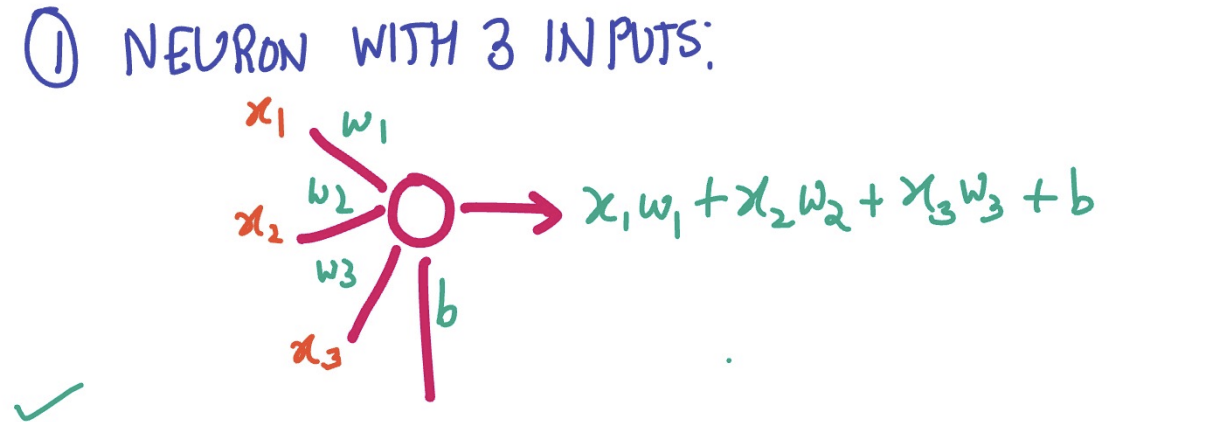

In [ ]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias

print(output)

2.3


In [ ]:
# NN with 4 input
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3]  + bias

print(output)

4.8


### Layer of Neurons

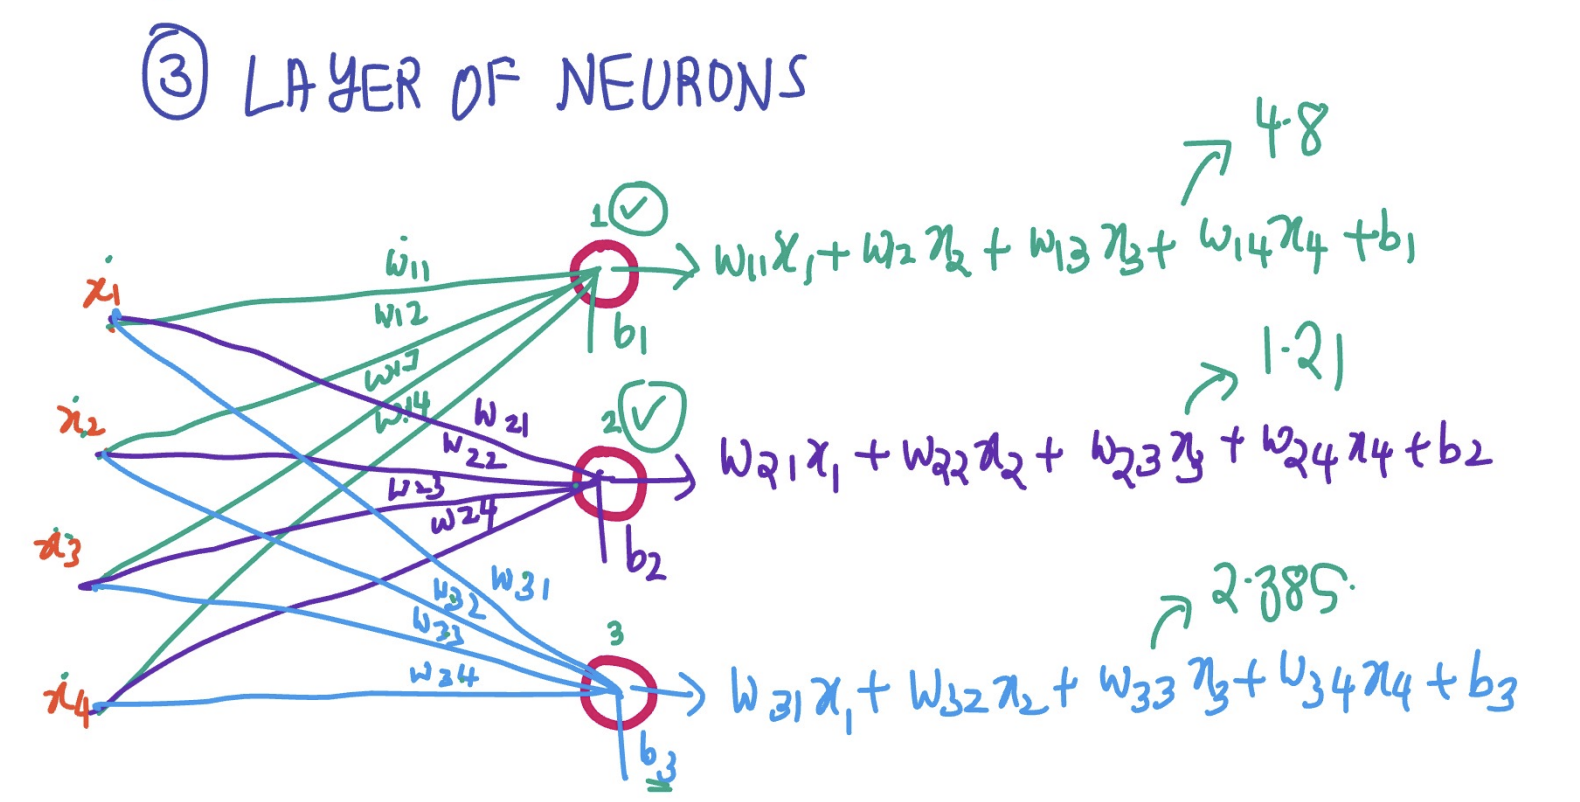

In [ ]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]

weights1 = weights[0] #LIST OF WEIGHTS ASSOCIATED WITH 1ST NEURON : W11, W12, W13, W14
weights2 = weights[1] #LIST OF WEIGHTS ASSOCIATED WITH 2ND NEURON : W21, W22, W23, W24
weights3 = weights[2] #LIST OF WEIGHTS ASSOCIATED WITH 3RD NEURON : W31, W32, W33, W34

biases = [2, 3, 0.5]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
 # Neuron 1:
 inputs[0]*weights1[0] +
 inputs[1]*weights1[1] +
 inputs[2]*weights1[2] +
 inputs[3]*weights1[3] + bias1,
 # Neuron 2:
 inputs[0]*weights2[0] +
 inputs[1]*weights2[1] +
 inputs[2]*weights2[2] +
 inputs[3]*weights2[3] + bias2,
 # Neuron 3:
 inputs[0]*weights3[0] +
 inputs[1]*weights3[1] +
 inputs[2]*weights3[2] +
 inputs[3]*weights3[3] + bias3]

print(outputs)

[4.8, 1.21, 2.385]


In [13]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]


layer_outputs = []

# For each neuron
for n_weights, n_bias in zip(weights, biases):
  n_output = 0

  # For each input and weight to the neuron
  for n_input, weight in zip(inputs, n_weights):
    n_output += (n_input * weight)

  n_output += n_bias
  layer_outputs.append(n_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


## Numpy for efficiency

Understaning of numpy and dot product

In [27]:
# dot product examples
import numpy as np

x = [1,2,3]
y = [1,2,3]

print(np.dot(x, y)) # 1*1 + 2*2 + 3*3
print(np.dot(y,x))

a = [1,2,3]
b = [[4,5,6], [7,8,9], [10,11,12]]

print(np.dot(b,a))
print(np.dot(a,b))

14
14
[32 50 68]
[48 54 60]


### 🔍 Why Different?

Because matrix multiplication is **not commutative**:

The two expressions correspond to:

* `b @ a` → multiplies **rows of b** with **a**
* `a @ b` → multiplies **a** with **columns of b**

They’re transposes of each other **only if b is symmetric** (which it’s not here).

---

### ✅ Summary

| Expression     | Shapes     | Meaning                      | Result         |
| -------------- | ---------- | ---------------------------- | -------------- |
| `np.dot(b, a)` | (3,3)·(3,) | `b @ a` → column vector form | `[32, 50, 68]` |
| `np.dot(a, b)` | (3,)·(3,3) | `a @ b` → row vector form    | `[48, 57, 66]` |

So — **same numbers involved, different orientation → different output.**


In [28]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
outputs = np.dot(weights, inputs) + bias
print(outputs)

outputs1 = np.dot(inputs, weights) + bias
print(outputs1)

4.8
4.8


LAYER OF NEURONS USING NUMPY

---

In plain Python, we wrote this as a list of lists. With NumPy, this will be a 2-dimensional array, which we’ll call a matrix.

In [30]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


### 🧮 Step 1: `np.dot(weights, inputs)`

* `weights`: `(3,4)`
* `inputs`: `(4,)` (1D vector)

✅ NumPy treats `(4,)` as a **column vector**, i.e., shape `(4,1)` conceptually.


But NumPy doesn’t literally make it `(3,1)` —
it **returns a 1D array of shape `(3,)`** (not `(3,1)`),
because it flattens any trailing singleton dimension.

So the result is:

```python
array([4.8, 1.21, 2.385])
```

with shape `(3,)`.

---

### 🧮 Step 2: `+ biases`

* result from dot product → shape `(3,)`
* biases → shape `(3,)`

NumPy checks the shapes:

* Both are 1D with same length → **elementwise addition**, not broadcasting.

✅ So:
[
[4.8, 1.21, 2.385] + [2, 3, 0.5] = [6.8, 4.21, 2.885]
]

---

### 🧠 Key Clarifications

| Concept                  | Actual Behavior                                           | Misconception                    |
| ------------------------ | --------------------------------------------------------- | -------------------------------- |
| Dot product result shape | `(3,)` (1D)                                               | Not `(3,1)`                      |
| Bias addition            | elementwise on `(3,)`                                     | Not broadcast to `(3,3)`         |
| Why it works             | NumPy automatically flattens trailing dimension after dot | You don’t see `(3,1)` explicitly |

---

### ✅ In short:

> NumPy **does not** convert the dot result to `(3,1)` nor broadcast biases to `(3,3)`.
> Instead, both are `(3,)`, so addition happens **elementwise** — one bias per neuron.

LAYER OF NEURONS AND BATCH OF DATA USING NUMPY


Until now we have seen one input, we can find for multiple inputs(batch of input).

for one batch there will be 3 outputs, so result will be 3x3 matrix.

In [36]:
inputs = [[1.0, 2.0, 3.0, 2.5], [2.0, 5.0, -1.0, 2.0], [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]


outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
